## Fertility Rates EDA

##### By Eric Wilson

In this notebook, we will be looking at 60 years of fertility rate data, to determine what the trend has been, and how it differs between various countries.

In [59]:
### importing libraries: numpy for math, pandas for data, and pyplot for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### printing 'complete!' after the libraries are imported, to ensure nothing went wrong
print('complete!')

complete!


In [60]:
### read csv file into a dataframe named fertrate
fertrate = pd.read_csv('/kaggle/input/fertility-rate-19602020/fertility_rate.csv')
### check dataframe size
print('Data shape: ', fertrate.shape)
### Calling the first 3 rows, just to look at the basic dataframe setup
fertrate.head(3)

Data shape:  (187, 62)


,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,_World,4.98,5.00,5.03,5.05,5.06,5.04,4.99,4.97,4.92,...,2.50,2.49,2.47,2.46,2.46,2.44,2.43,2.41,2.40,2.39
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
2,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,...,1.67,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58


In this data, we have 187 rows (186 countries, plus the global average), over 62 columns (the country, and 61 years of records, from 1960-2020).

Let's visualize some of the data; first, we'll start with a basic line plot of global fertility trends.
___
#### Global Fertility Rates

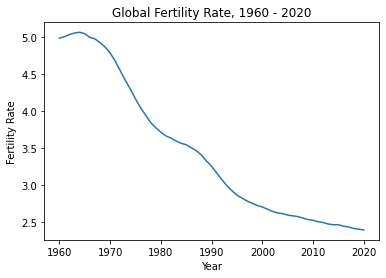

In [61]:
### select only the "_World" column, transpose it, and drop the "_World" and "Country" row on top
fertworld = fertrate[0:1].T
fertworld = fertworld[1:]
### Create a basic line graph, adding axis labels and a title
fertworld.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Global Fertility Rate, 1960 - 2020')
plt.show()

All in all, the fertility rate has decreased significantly over the past 60 years, falling in 2020 to roughly one half of what it was in 1960. Next, let's look at the most fertile and least fertile countries, as of 2020, and see how their fertility rates have changed over the past 60 years.

___

#### Highest and Lowest Fertility Rates, as of 2020

In [62]:
### create mini dataframes of the highest and lowest fertility rates
minfert = fertrate[fertrate['2020'] == fertrate['2020'].min()]
maxfert = fertrate[fertrate['2020'] == fertrate['2020'].max()]
### identify the highest and lowest countries, along with their 2020 fertility rate
print('The country with the lowest fertility rate, as of 2020, is: ',
      minfert.iloc[0,0], ', with a fertility rate of: ', fertrate['2020'].min())
print('The country with the highest fertility rate, as of 2020, is: ',
      maxfert.iloc[0,0], ', with a fertility rate of: ', fertrate['2020'].max())

The country with the lowest fertility rate, as of 2020, is:  South Korea , with a fertility rate of:  0.84
The country with the highest fertility rate, as of 2020, is:  Niger , with a fertility rate of:  6.74


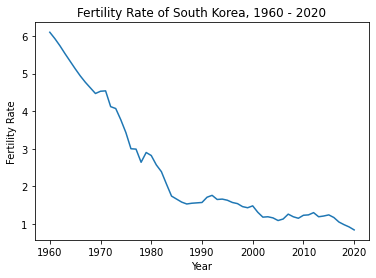

In [63]:
### choose the data of the lowest fertility rate as of 2020, transpose it, and drop the first row 
minplot = minfert.T
minplot = minplot[1:]
### Create a basic line graph, adding axis labels and a title
minplot.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of South Korea, 1960 - 2020')
plt.show()

#### South Korea

"South Korea, an East Asian nation on the southern half of the Korean Peninsula, shares one of the world’s most heavily militarized borders with North Korea. It’s equally known for its green, hilly countryside dotted with cherry trees and centuries-old Buddhist temples, plus its coastal fishing villages, sub-tropical islands and high-tech cities such as Seoul, the capital. ― Google"

South Korea, with a population of 51.74 million, according to the World Bank, has the lowest fertility rate as of 2020, at 0.84. With a rate of over 6 in 1960, it sharply declined until the 1980s, and has since continued to decline, although more gradually. 

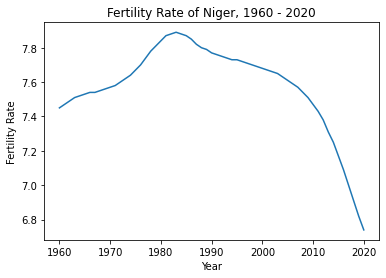

In [64]:
### choose the data of the lowest fertility rate as of 2020, transpose it, and drop the first row 
maxplot = maxfert.T
maxplot = maxplot[1:]
### Create a basic line graph, adding axis labels and a title
maxplot.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of Niger, 1960 - 2020')
plt.show()

#### Niger

"Niger or the Niger, officially the Republic of the Niger, is a landlocked country in West Africa. It is a unitary state bordered by Libya to the northeast, Chad to the east, Nigeria to the south, Benin and Burkina Faso to the southwest, Mali to the west, and Algeria to the northwest. - Wikipedia"

Niger, with a population of 25.13 million, has the highest fertility rate as of 2020, at 6.74. The fertility rate of Niger increased from 1960 until the 1980s, when it began to decline steadily until roughly 2010, when it began to decline more rapidly.

___


#### Changes in Fertility Rates

In [65]:
### creating a column to measure the absolute value of change in rate from 1960 to 2020
fertrate['Change'] = np.abs(fertrate['2020'] - fertrate['1960'])
### first 3 observations
fertrate.head(3)

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Change
0,_World,4.98,5.00,5.03,5.05,5.06,5.04,4.99,4.97,4.92,...,2.49,2.47,2.46,2.46,2.44,2.43,2.41,2.40,2.39,2.59
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18,3.27
2,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,...,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58,4.91


In [66]:
### create mini dataframes of the highest and lowest fertility rates
minchange = fertrate[fertrate['Change'] == fertrate['Change'].min()]
maxchange = fertrate[fertrate['Change'] == fertrate['Change'].max()]
### identify the highest and lowest countries, along with their 2020 fertility rate
print('The country with the least change in fertility rate from 1960 to 2020 is: ',
      minchange.iloc[0,0], ', with a decline of: ', fertrate['Change'].min())
print('The countries with the highest change fertility rate from 1960 to 2020 are: ',
      maxchange.iloc[0,0], ' and ', maxchange.iloc[1,0], ', with a decline of: ', fertrate['Change'].max())

The country with the least change in fertility rate from 1960 to 2020 is:  Czechia , with a decline of:  0.3799999999999999
The countries with the highest change fertility rate from 1960 to 2020 are:  St. Lucia  and  United Arab Emirates , with a decline of:  5.56


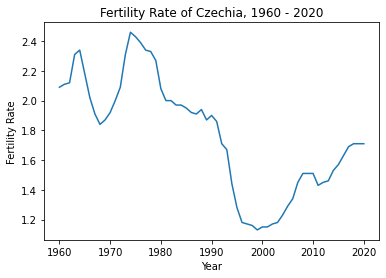

In [67]:
### choose the data of the lowest fertility rate as of 2020, transpose it, and drop the first row 
mincplot = minchange.T
mincplot = mincplot[1:-1]
### Create a basic line graph, adding axis labels and a title
mcplot.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of Czechia, 1960 - 2020')
plt.show()

#### Czechia

"The Czech Republic, also known as Czechia, is a landlocked country in Central Europe. Historically known as Bohemia, it is bordered by Austria to the south, Germany to the west, Poland to the northeast, and Slovakia to the southeast. - Wikipedia"

Czechia, with a population of 10.7 million, has had the smallest change in overall fertility rates between 1960 and 2020, amounting to a decline of roughly 0.38. There was a significant decline and trough from 1990 to 2000, before the fertility rate began to rise again, although it remains at a lower level than in 1960.

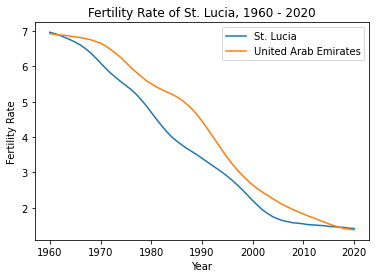

In [68]:
### choose the data of the lowest fertility rate as of 2020, transpose it, and drop the first row 
maxcplot = maxchange.T
maxcplot = maxcplot[1:-1]
### Create a basic line graph, adding axis labels, a legend and a title
maxcplot.plot()
plt.legend(['St. Lucia', 'United Arab Emirates'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of St. Lucia, 1960 - 2020')
plt.show()

#### St. Lucia

"Saint Lucia is an Eastern Caribbean island nation with a pair of dramatically tapered mountains, the Pitons, on its west coast. Its coast is home to volcanic beaches, reef-diving sites, luxury resorts and fishing villages. Trails in the interior rainforest lead to waterfalls like the 15m-high Toraille, which pours over a cliff into a garden. The capital, Castries, is a popular cruise port. ― Google"

With a population of 184,401, St. Lucia is one of the countries with the largest overall change, equal to a decline of 5.56, in fertility rates, showing a steady decline from 1960 until 2020.
___

#### United Arab Emirates

"The United Arab Emirates, or simply the Emirates, is a country in Western Asia. It is located at the eastern end of the Arabian Peninsula and shares borders with Oman and Saudi Arabia, while having maritime borders in the Persian Gulf with Qatar and Iran. - Wikipedia"

With a population of 9.991 million, the United Arab Emirates is tied with St. Lucia for the country with the largest change in fertility rate from 1960 to 2020, with a steady decline of 5.56 seen throughout this period

___

#### Germany, the USA, and the Philippines

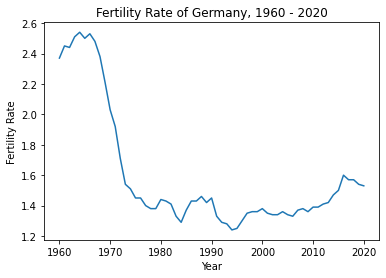

In [69]:
### Fertility rates of Germany
DEU = fertrate[fertrate['Country'] == 'Germany']
DEU = DEU.T
DEU = DEU[1:-1]
DEU.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of Germany, 1960 - 2020')
plt.show()

#### Germany

"Germany is a Western European country with a landscape of forests, rivers, mountain ranges and North Sea beaches. It has over 2 millennia of history. Berlin, its capital, is home to art and nightlife scenes, the Brandenburg Gate and many sites relating to WWII. Munich is known for its Oktoberfest and beer halls, including the 16th-century Hofbräuhaus. Frankfurt, with its skyscrapers, houses the European Central Bank. ― Google"

Germany, with a population of 83.13 million, saw a sharp relative decline in fertility rates from the 1960s until the 1980s, when it stabilized, before grwoing slightly in the 2010s. 

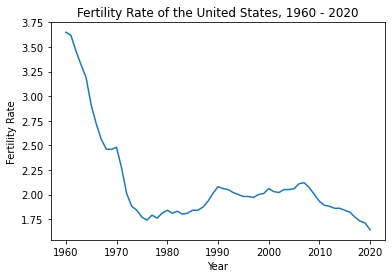

In [70]:
### Fertility rates of the United States
USA = fertrate[fertrate['Country'] == 'United States']
USA = USA.T
USA = USA[1:-1]
USA.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of the United States, 1960 - 2020')
plt.show()


#### The United States

"The U.S. is a country of 50 states covering a vast swath of North America, with Alaska in the northwest and Hawaii extending the nation’s presence into the Pacific Ocean. Major Atlantic Coast cities are New York, a global finance and culture center, and capital Washington, DC. Midwestern metropolis Chicago is known for influential architecture and on the west coast, Los Angeles' Hollywood is famed for filmmaking. ― Google"

The United States, a country of 331.9 million, saw a significant decline in fertility rates from 1960 until the 1970s, when a weak upwards trend began until the 2000s, in which fertility rates began to decline again.

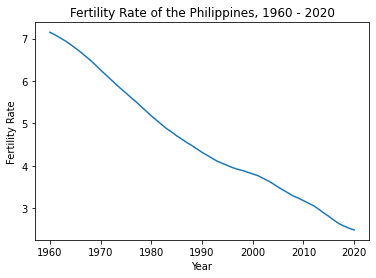

In [75]:
### Fertility rates of the Philippines
PHI = fertrate[fertrate['Country'] == 'Philippines']
PHI = PHI.T
PHI = PHI[1:-1]
PHI.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of the Philippines, 1960 - 2020')
plt.show()

#### The Philippines

"The Philippines, officially the Republic of the Philippines, is an archipelagic country in Southeast Asia. It is situated in the western Pacific Ocean and consists of around 7,641 islands that are broadly categorized under three main geographical divisions from north to south: Luzon, Visayas, and Mindanao. - Wikipedia"

The Philippines, a country of 111 million, has seen a steady downwards trend (to the eye, almost perfectly linear) in fertility rates from 1960 to 2020.

In [ ]:
### If you want to copy the code, you can try a country here
# replace "c" with your country of choice
# c = fertrate[fertrate['Country'] == 'c']
# c = c.T
# c = c[1:-1]
# c.plot(legend = None)
# plt.xlabel('Year')
# plt.ylabel('Fertility Rate')
# plt.title('Fertility Rate of c, 1960 - 2020')
# plt.show()

### Conclusion

Globally, fertility rates have fallen from 1960 to 2020. This is, in large part, due to parents producing fewer children, which can be partially attributed to a higher standard of living and lowered rates of child mortality.

Thank you for taking the time to read this, and any feedback / questions / comments are always welcome!